<a href="https://colab.research.google.com/github/Don-Ho25/Colab_Git_Assignment2/blob/main/Lesson6/Lesson_6_ml_basic_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ASSIGNMENT 6


DONG


link to github:  

## **Assignment Simple machine Learning Project cycle**

### **_House Price Prediction Using California Housing Data_**
This dataset provides information about house prices in California. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "California Housing Dataset" from sklearn.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




In [60]:
#  1-- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# 2-- Data Collection and Loading ---
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

In [39]:
# 3-- Quick Check of Data ---
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


All features and the target variable are continuous numerical variables.

In [40]:
# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


All the data in this dataset are real numbers floats).

In [41]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


The dataset contains 8 features manely, _MedInc 	HouseAge 	AveRooms 	AveBedrms 	Population 	AveOccup 	Latitude 	Longitude_ and one target value (_MedHouseVal_).

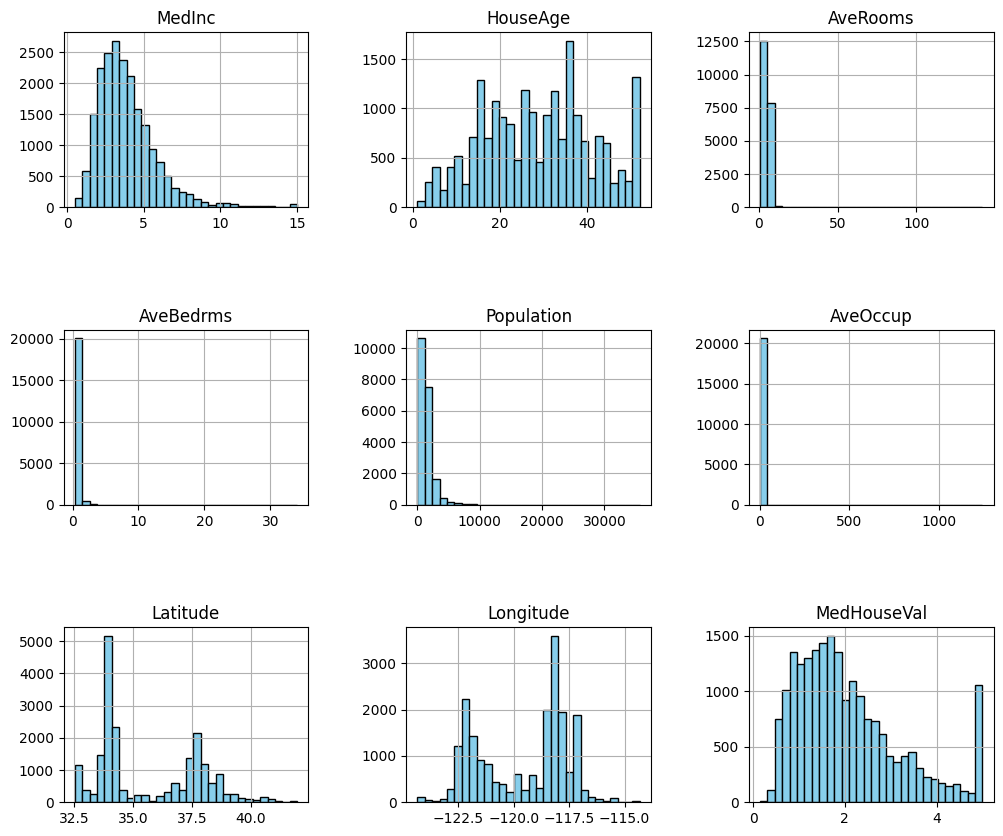

In [76]:
df.hist(figsize=(12, 10), bins=30, color="skyblue",edgecolor='k')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The histograms above give an idea on the features to be considered in the prediction.

In [42]:
# 4-- EDA and Data Preprocessing ---

# 4.1 Check for missing/null values.
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


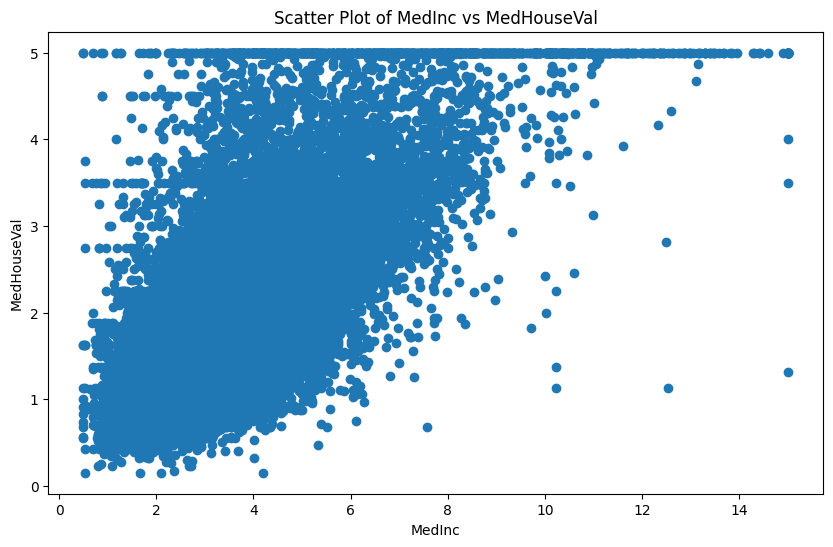

In [43]:
# 4.2 Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
# Example: Use `plt.scatter()` to visualize the relationship between 'MedInc' and 'MedHouseVal'.
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['MedHouseVal'])
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Scatter Plot of MedInc vs MedHouseVal')
plt.show()

In [55]:
# 4.3 Create a function to automate scatter plots for all features vs MedHouseVal.

print("The plot can be done by either seaborn or Matplotlib.\nThe other method is in comments.")

def Scatter_Features_vs_Medhouseval(DF, Target='MedHouseVal'):

    features = DF.drop(Target, axis=1)  # All columns except target
    target = DF[Target]

    # Calculate number of subplots needed
    n_features = len(features.columns)
    n_cols = 2  # Number of columns in subplot grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    # Create scatter plot for each feature
    print(f"Generating scatter plots for features vs '{Target}'...")
    for i, feature in enumerate(features.columns):
        axes[i].scatter(features[feature], target, alpha=0.6)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(Target)
        axes[i].set_title(f'{feature} vs {Target}')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Hide empty subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()




# def Scatter_Features_vs_Medhouseval(DF, Target='MedHouseVal'):
#   """
#   Generates scatter plots for all features against 'MedHouseVal' in a DataFrame.

#   Parameters: the DataFrame and the target variable column name.
#   """
#   if Target not in DF.columns:
#       print(f"Error: '{Target}' column not found in the DataFrame.")
#       return

#   # Separate features and target
#   # features = [col for col in DF.columns if col != Target]
#   features = DF.drop(Target, axis=1)  # All columns except target
#   target = DF[Target]

#   print(f"Generating scatter plots for features vs '{Target}'...")

#   # Determine the number of rows and columns for the subplots
#   num_features = len(features)
#   num_cols = 3
#   num_rows = (num_features + num_cols - 1) // num_cols

#   plt.figure(figsize=(num_cols * 4, num_rows * 4))

#   for i, feature in enumerate(features):
#       plt.subplot(num_rows, num_cols, i + 1)
#       sns.scatterplot(data=DF, x=feature, y=Target, alpha=0.6)
#       plt.title(f'{feature} vs {Target}')
#       plt.xlabel(feature)
#       plt.ylabel(Target)
#       plt.grid(True, linestyle='--', alpha=0.7)

#   plt.tight_layout()
#   plt.show()

The plot can be done by either seaborn or Matplotlib.
The other method is in comments.


   MedInc  HouseAge  AveRooms  AveOccup  MedHouseVal
0  8.3252      41.0  6.984127  2.555556        4.526
1  8.3014      21.0  6.238137  2.109842        3.585
2  7.2574      52.0  8.288136  2.802260        3.521
3  5.6431      52.0  5.817352  2.547945        3.413
4  3.8462      52.0  6.281853  2.181467        3.422

Generating scatter plots for features vs 'MedHouseVal'...


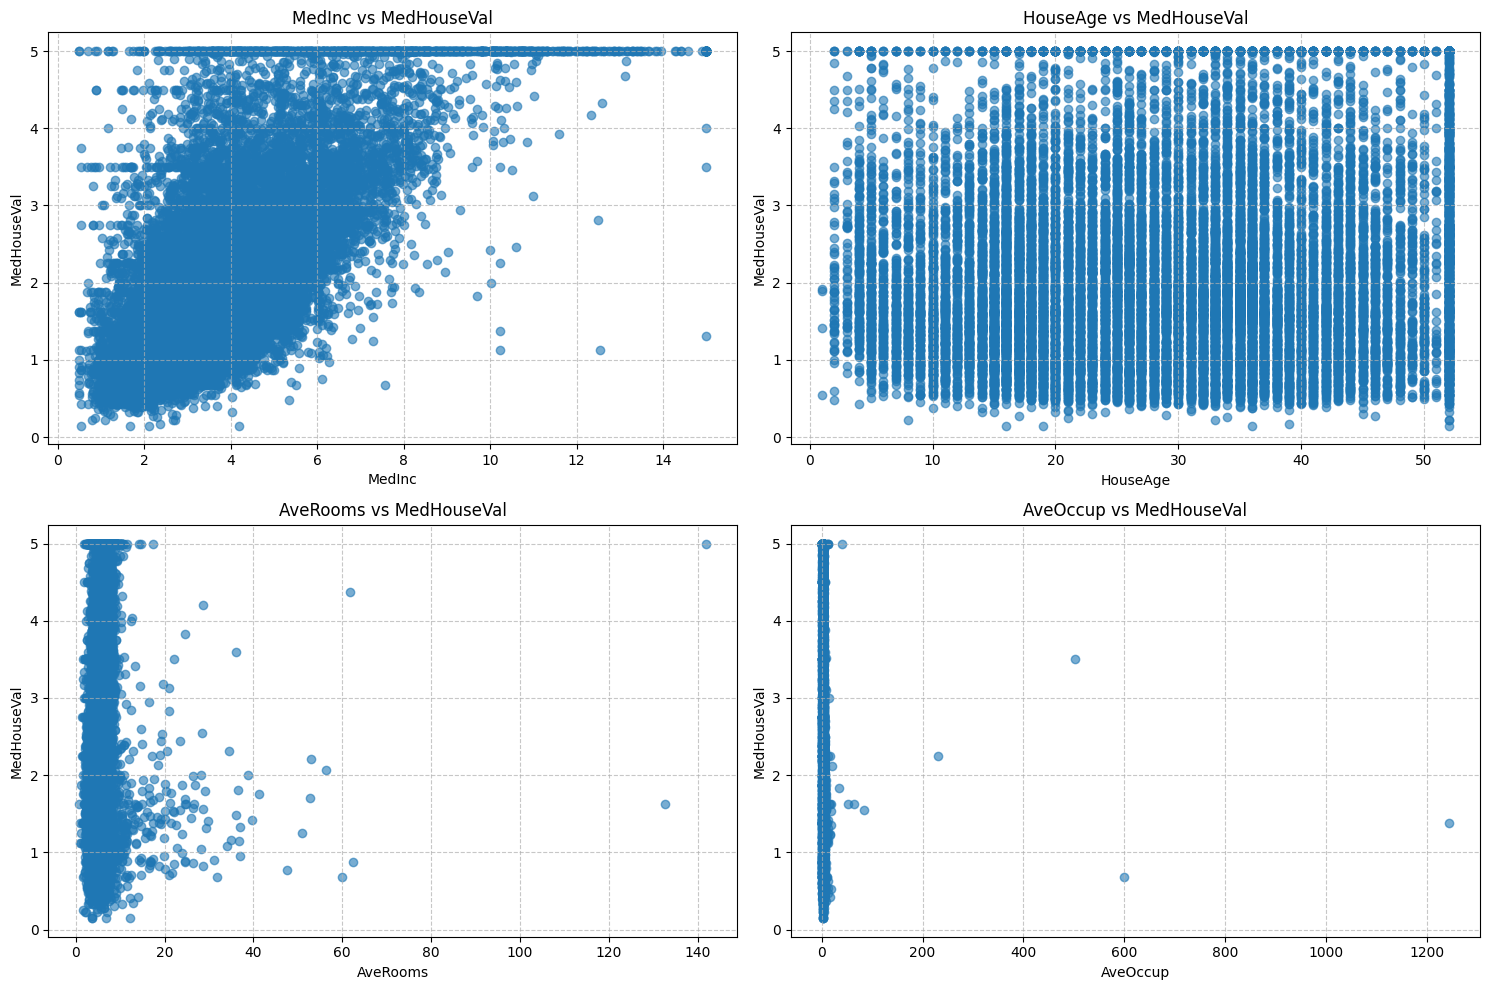

In [56]:
# 4.4  Use the function to visualize the relationships between multiple features and the target variable.
# Features: ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
# Target: 'MedHouseVal'

to_drop = ['AveBedrms', 'Population', 'Latitude', 'Longitude'  ]
df_new = df.drop(to_drop, axis=1)
print(f'{df_new.head()}\n')
Scatter_Features_vs_Medhouseval(df_new)


In [57]:
# 5. ML Model Training:
# 5 .1    Split the dataset into training and testing sets.
X= df_new.drop('MedHouseVal', axis=1)
y= df_new['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [64]:
# 5. 2 Choose an appropriate regression model and train it on the training data.
model1 = LinearRegression()
model1.fit(x_train, y_train)

# model2 = LogisticRegression
# model2.fit(x_train, y_train)

LinearRegression()

In [65]:
# 6.--- Model Evaluation ---
y_pred = model1.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)
R_squared = r2_score(y_test, y_pred)
print(f"RMSE: {RMSE}")
print(f"R-squared: {R_squared}")

RMSE: 0.657451727882265
R-squared: 0.49828508595474374


The peformance of the linear regression on this data is very low. One may consider testing another model.

In [78]:
# 7--- Model Prediction ---
# Predict Median House Value from a new set of feature inputs.
# Example new data: 'MedInc' = 3, 'HouseAge' = 30, 'AveRooms' = 6, 'AveOccup' = 3, 'Latitude' = 34, 'Longitude' = -118, 'AveBedrms' = 1, 'Population' = 1500

# Features: MedInc  HouseAge  AveRooms  AveOccup
new_features= [ 3, 30, 6, 3]      #, 34, -118, 1, 1500]
new_input = pd.DataFrame([new_features], columns=X.columns)
prediction = model1.predict(new_input)
print(f"Predicted Median House Value is: {prediction[0]:.3f}")

Predicted Median House Value is: 1.688
